# МАТ ОБРАБОТКА

## Интерполирование 

Результаты интерполяции:

Точка x = 0.1535:
Первый полином Ньютона: 0.857701
Второй полином Ньютона: 0.857701
Остаточный член: -3.62e-08

Точка x = 0.7333:
Первый полином Ньютона: 0.480918
Второй полином Ньютона: 0.480918
Остаточный член: -2.00e-03

Точка x = 0.1000:
Первый полином Ньютона: 0.904838
Второй полином Ньютона: 0.904838
Остаточный член: 3.00e-06

Точка x = 0.7540:
Первый полином Ньютона: 0.471194
Второй полином Ньютона: 0.471194
Остаточный член: -2.47e-03


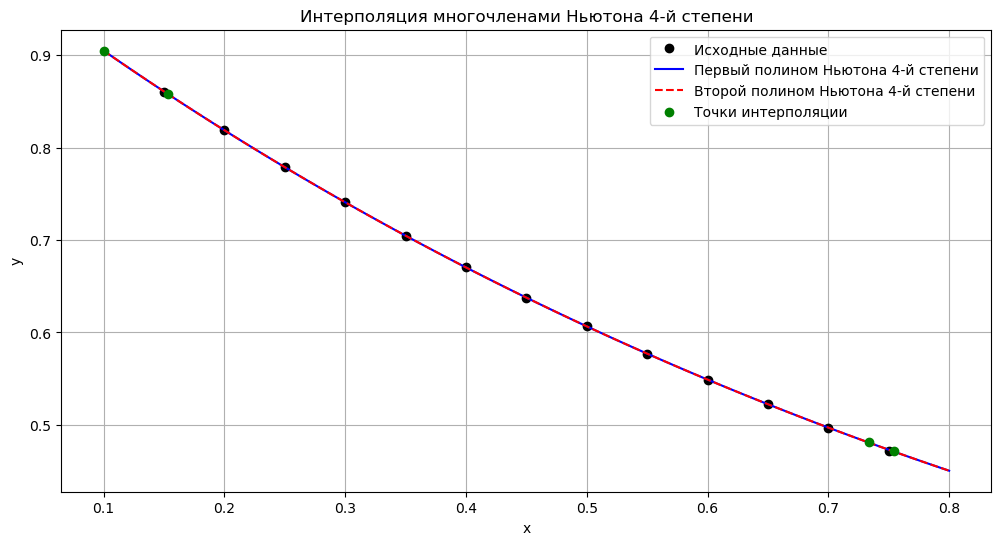


Коэффициенты первого полинома Ньютона:
a_0 = 0.860708
a_1 = -0.839540
a_2 = 0.409400
a_3 = -0.133333
a_4 = 0.040000

Коэффициенты второго полинома Ньютона:
a_0 = 0.704688
a_1 = -0.722600
a_2 = 0.370600
a_3 = -0.125333
a_4 = 0.040000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x, y):
    """Вычисляет таблицу разделенных разностей"""
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    
    return coef

def newton_poly(coef, x_data, x):
    """Вычисляет значение полинома Ньютона в точке x"""
    n = len(x_data)
    result = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        result += term
    return result

# Исходные данные
x_data = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 
                   0.55, 0.60, 0.65, 0.70, 0.75])
y_data = np.array([0.860708, 0.818731, 0.778801, 0.740818, 0.704688, 
                  0.670320, 0.637628, 0.606531, 0.576950, 0.548812, 
                  0.522046, 0.496585, 0.4722367])

# Точки для интерполяции
x_points = [0.1535, 0.7333, 0.100, 0.7540]

# Вычисляем разделенные разности
dd = divided_differences(x_data, y_data)

# Берем первые 5 точек для полинома 4-й степени
n = 5  # степень полинома + 1
x_interp = x_data[:n]
y_interp = y_data[:n]

# 1. Первый полином Ньютона (вперед)
dd_forward = divided_differences(x_interp, y_interp)
coef_forward = dd_forward[0, :n]

# 2. Второй полином Ньютона (назад)
dd_backward = divided_differences(x_interp[::-1], y_interp[::-1])
coef_backward = dd_backward[0, :n]

# Вычисляем значения в заданных точках
print("Результаты интерполяции:")
for x in x_points:
    # Первый полином
    y_forward = newton_poly(coef_forward, x_interp, x)
    # Второй полином
    y_backward = newton_poly(coef_backward, x_interp[::-1], x)
    # Остаточный член
    omega = np.prod([x - xi for xi in x_interp])
    residual = dd[0, n] * omega  # n-я разделенная разность
    
    print(f"\nТочка x = {x:.4f}:")
    print(f"Первый полином Ньютона: {y_forward:.6f}")
    print(f"Второй полином Ньютона: {y_backward:.6f}")
    print(f"Остаточный член: {residual:.2e}")

# Визуализация
x_plot = np.linspace(0.1, 0.8, 100)
y_forward_plot = [newton_poly(coef_forward, x_interp, x) for x in x_plot]
y_backward_plot = [newton_poly(coef_backward, x_interp[::-1], x) for x in x_plot]

plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, 'ko', label='Исходные данные')
plt.plot(x_plot, y_forward_plot, 'b-', label='Первый полином Ньютона 4-й степени')
plt.plot(x_plot, y_backward_plot, 'r--', label='Второй полином Ньютона 4-й степени')
plt.scatter(x_points, [newton_poly(coef_forward, x_interp, x) for x in x_points], 
            c='green', zorder=5, label='Точки интерполяции')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция многочленами Ньютона 4-й степени')
plt.legend()
plt.grid(True)
plt.show()

# Вывод коэффициентов полиномов
print("\nКоэффициенты первого полинома Ньютона:")
for i, c in enumerate(coef_forward):
    print(f"a_{i} = {c:.6f}")

print("\nКоэффициенты второго полинома Ньютона:")
for i, c in enumerate(coef_backward):
    print(f"a_{i} = {c:.6f}")

Значение многочлена Лагранжа L4(0.894) = -2.808815


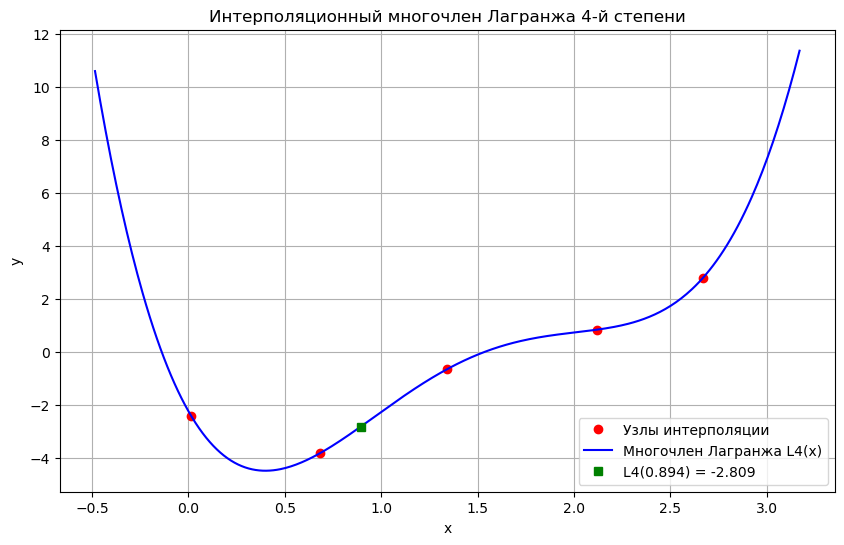

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x_nodes = np.array([0.015, 0.681, 1.342, 2.118, 2.671])
y_nodes = np.array([-2.417, -3.819, -0.642, 0.848, 2.815])
x_target = 0.894

def lagrange_poly(x, x_nodes, y_nodes):
    """Вычисляет значение интерполяционного многочлена Лагранжа в точке x"""
    n = len(x_nodes)
    result = 0.0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# Вычисляем значение многочлена в целевой точке
L4 = lagrange_poly(x_target, x_nodes, y_nodes)
print(f"Значение многочлена Лагранжа L4({x_target}) = {L4:.6f}")

# Визуализация
x_plot = np.linspace(min(x_nodes)-0.5, max(x_nodes)+0.5, 400)
y_plot = [lagrange_poly(x, x_nodes, y_nodes) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_nodes, y_nodes, 'ro', label='Узлы интерполяции')
plt.plot(x_plot, y_plot, 'b-', label='Многочлен Лагранжа L4(x)')
plt.plot(x_target, L4, 'gs', label=f'L4({x_target}) = {L4:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяционный многочлен Лагранжа 4-й степени')
plt.legend()
plt.grid(True)
plt.show()

## Дифференцирование

In [6]:
import numpy as np

# Исходные данные
x_data = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 
                   0.55, 0.60, 0.65, 0.70, 0.75])
y_data = np.array([0.860708, 0.818731, 0.778801, 0.740818, 0.704688, 
                   0.670320, 0.637628, 0.606531, 0.576950, 0.548812, 
                   0.522046, 0.496585, 0.4722367])

# Заданные точки
x1 = 0.1535
x2 = 0.7333

# 1. Вычисление производных по Ньютону (n=4)
def newton_derivatives(x, x_nodes, y_nodes, n=4):
    h = x_nodes[1] - x_nodes[0]  # шаг
    idx = np.searchsorted(x_nodes, x) - 1
    idx = max(0, min(idx, len(x_nodes)-n-1))
    
    # Конечные разности
    delta1 = y_nodes[idx+1] - y_nodes[idx]
    delta2 = y_nodes[idx+2] - 2*y_nodes[idx+1] + y_nodes[idx]
    delta3 = y_nodes[idx+3] - 3*y_nodes[idx+2] + 3*y_nodes[idx+1] - y_nodes[idx]
    delta4 = y_nodes[idx+4] - 4*y_nodes[idx+3] + 6*y_nodes[idx+2] - 4*y_nodes[idx+1] + y_nodes[idx]
    
    # Первая производная
    f1 = (delta1 - delta2/2 + delta3/3 - delta4/4) / h
    
    # Вторая производная
    f2 = (delta2 - delta3 + 11*delta4/12) / (h**2)
    
    return f1, f2

# Выбираем узлы вокруг x1 и x2 для n=4
nodes_x1 = x_data[:5]  # первые 5 точек для x1
nodes_y1 = y_data[:5]

nodes_x2 = x_data[-5:] # последние 5 точек для x2
nodes_y2 = y_data[-5:]

# Производные по Ньютону
f1_newton_x1, f2_newton_x1 = newton_derivatives(x1, nodes_x1, nodes_y1)
f1_newton_x2, f2_newton_x2 = newton_derivatives(x2, nodes_x2, nodes_y2)

# 2. Вычисление производных по Лагранжу (n=2) для x2
def lagrange_derivatives(x, x_nodes, y_nodes):
    h = x_nodes[1] - x_nodes[0]
    idx = np.searchsorted(x_nodes, x) - 1
    idx = max(0, min(idx, len(x_nodes)-3))
    
    x0, x1, x2 = x_nodes[idx], x_nodes[idx+1], x_nodes[idx+2]
    y0, y1, y2 = y_nodes[idx], y_nodes[idx+1], y_nodes[idx+2]
    
    # Первая производная
    f1 = (y0*(2*x - x1 - x2)/((x0-x1)*(x0-x2)) +
          y1*(2*x - x0 - x2)/((x1-x0)*(x1-x2)) +
          y2*(2*x - x0 - x1)/((x2-x0)*(x2-x1)))
    
    # Вторая производная
    f2 = 2*(y0/((x0-x1)*(x0-x2)) +
            y1/((x1-x0)*(x1-x2)) +
            y2/((x2-x0)*(x2-x1)))
    
    return f1, f2

# Выбираем 3 узла вокруг x2 для Лагранжа
lagrange_nodes_x = x_data[-3:]
lagrange_nodes_y = y_data[-3:]

f1_lagrange_x2, f2_lagrange_x2 = lagrange_derivatives(x2, lagrange_nodes_x, lagrange_nodes_y)

# Вывод результатов
print("Производные по Ньютону (n=4):")
print(f"В точке x1 = {x1}:")
print(f"Первая производная: {f1_newton_x1:.6f}")
print(f"Вторая производная: {f2_newton_x1:.6f}\n")

print(f"В точке x2 = {x2}:")
print(f"Первая производная: {f1_newton_x2:.6f}")
print(f"Вторая производная: {f2_newton_x2:.6f}\n")

print("Производные по Лагранжу (n=2) для x2:")
print(f"Первая производная: {f1_lagrange_x2:.6f}")
print(f"Вторая производная: {f2_lagrange_x2:.6f}")

Производные по Ньютону (n=4):
В точке x1 = 0.1535:
Первая производная: -0.860707
Вторая производная: 0.861000

В точке x2 = 0.7333:
Первая производная: -0.576300
Вторая производная: 0.529657

Производные по Лагранжу (n=2) для x2:
Первая производная: -0.483272
Вторая производная: 0.445080


Вот график, может быть и численно я ошибаюсь, но со знаком нет (ну я по нему и проверял) - кружочки это и есть точки, где брали производные.

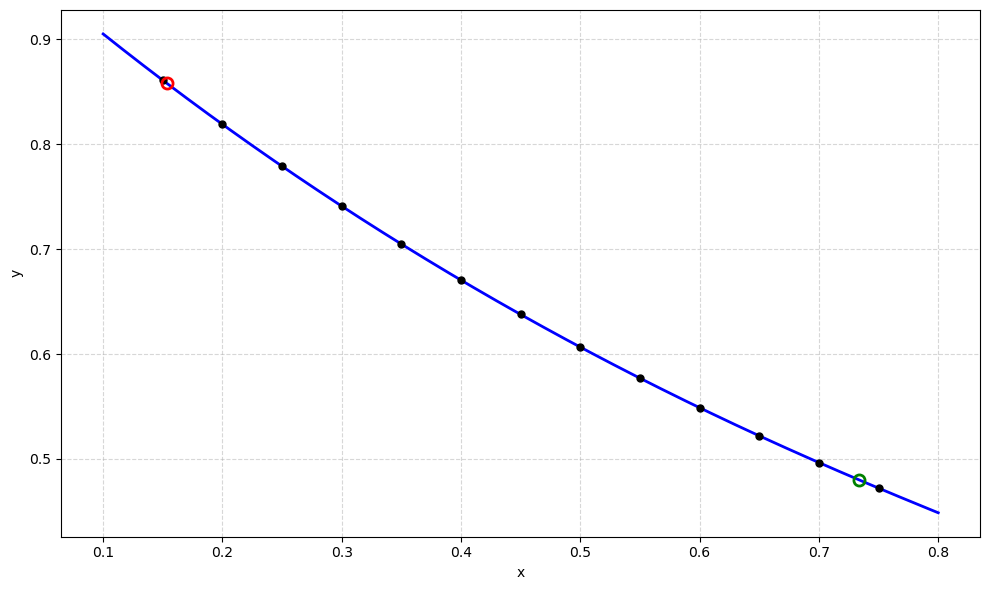

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Исходные данные
x_data = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                   0.55, 0.60, 0.65, 0.70, 0.75])
y_data = np.array([0.860708, 0.818731, 0.778801, 0.740818, 0.704688,
                   0.670320, 0.637628, 0.606531, 0.576950, 0.548812,
                   0.522046, 0.496585, 0.4722367])

# Точки для отметки
x1 = 0.1535
x2 = 0.7333

# Создаем интерполяционную функцию
cs = CubicSpline(x_data, y_data)

# Построение графика
plt.figure(figsize=(10, 6))

# Гладкая кривая функции
x_smooth = np.linspace(min(x_data)-0.05, max(x_data)+0.05, 500)
plt.plot(x_smooth, cs(x_smooth), 'b-', linewidth=2)

# Исходные точки данных
plt.plot(x_data, y_data, 'ko', markersize=5)

# Отмечаем специальные точки
plt.plot(x1, cs(x1), 'ro', markersize=8, markerfacecolor='none', markeredgewidth=2)
plt.plot(x2, cs(x2), 'go', markersize=8, markerfacecolor='none', markeredgewidth=2)

# Настройки графика
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Интегрирование

In [13]:
import numpy as np
from math import log10

# Исходная функция
def f(x):
    return x**2 * log10(x) if x > 0 else 0

# Пределы интегрирования
a, b = 1.4, 3.0

# Количество узлов (n=9 для всех методов, кроме "3/8" где нужно n=10)
n_newton = 9
n_trapezoid = 9
n_simpson = 9  # Должно быть четное для Симпсона
n_three_eights = 10  # Должно быть кратно 3 для "3/8"

# 1. Формула Ньютона-Котеса (9 узлов)
def newton_cotes(a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [f(xi) for xi in x]
    
    # Весовые коэффициенты для n=9
    weights = [989, 5888, -928, 10496, -4540, 10496, -928, 5888, 989]
    total = sum(w*yi for w, yi in zip(weights, y))
    return (b - a) * total / 28350

# 2. Формула трапеций (9 узлов)
def trapezoid(a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [f(xi) for xi in x]
    return h * (0.5*y[0] + sum(y[1:-1]) + 0.5*y[-1])

# 3. Формула Симпсона (8 интервалов, 9 узлов)
def simpson(a, b, n):
    if n % 2 == 0: n += 1  # Делаем нечетным
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [f(xi) for xi in x]
    return h/3 * (y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-2:2]) + y[-1])

# 4. Формула "трех восьмых" (9 интервалов, 10 узлов)
def three_eights(a, b, n):
    if (n - 1) % 3 != 0: n += 3 - (n - 1) % 3  # Делаем кратным 3
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = [f(xi) for xi in x]
    return 3*h/8 * (y[0] + 3*sum(y[1:-1:3] + y[2:-1:3]) + 2*sum(y[3:-2:3]) + y[-1])

# Вычисляем интегралы
I_newton = newton_cotes(a, b, n_newton)
I_trapezoid = trapezoid(a, b, n_trapezoid)
I_simpson = simpson(a, b, n_simpson)
I_three_eights = three_eights(a, b, n_three_eights)

# Точное значение (для сравнения)
from scipy.integrate import quad
I_exact, _ = quad(f, a, b)

print(f"Ньютон-Котес (n={n_newton}): {I_newton:.6f}, ошибка: {abs(I_newton-I_exact):.2e}")
print(f"Трапеций (n={n_trapezoid}): {I_trapezoid:.6f}, ошибка: {abs(I_trapezoid-I_exact):.2e}")
print(f"Симпсона (n={n_simpson}): {I_simpson:.6f}, ошибка: {abs(I_simpson-I_exact):.2e}")
print(f"3/8 (n={n_three_eights}): {I_three_eights:.6f}, ошибка: {abs(I_three_eights-I_exact):.2e}")
print(f"Точное значение: {I_exact:.6f}")

Ньютон-Котес (n=9): 2.989961, ошибка: 1.02e-09
Трапеций (n=9): 3.000457, ошибка: 1.05e-02
Симпсона (n=9): 2.989958, ошибка: 2.92e-06
3/8 (n=10): 2.989957, ошибка: 4.08e-06
Точное значение: 2.989961


Метод трапеций - наименее точный, так как аппроксимирует функцию прямолинейными отрезками. Ошибка ~O(h²) (измерение ошибки о-большими исключительно для того, чтобы показать что у некотороых методов она примерна одинакова, я бы все-таки обращал внимание на численные данные).

Метод Симпсона - значительно точнее, поскольку использует квадратичную аппроксимацию (параболы). Ошибка ~O(h⁴).

Формула "3/8" - аналогична по точности Симпсону (тоже O(h⁴)), но использует кубическую аппроксимацию на каждом отрезке.

Ньютон-Котес (9 узлов) - самый точный в данном случае, так как использует полином высокого порядка (8-й степени) для аппроксимации.

Почему так? Вопрос другого характера. Если простым языком, то чем выше степень полинома, используемого для аппроксимации функции, тем точнее результат. Однако на практике методы Симпсона и "3/8" часто предпочтительнее, но возникают разные проблемы (их лучше видно на графиках, где мы по-просту видим что мы переходим к интреполяции сплайнами):
Для гладких функций (как наша x²lg(x)) методы высших порядков (Симпсон, 3/8) обычно дают отличную точность даже при небольшом числе узлов. Тут можно вдаваться в глубокии материи и сказать, что все методы перечисленные здесь чушь, компьютер чаще всего считает цепными дробями (или прямыми разложениями или многочленами Тейлора) и каждый методы показывают другие ошибки... и вообще самый лучший - аппроксимация Паде (низких степеней, тк тут аппроксимация линейная - производная же) (но я не хочу выглядеть наглым и просто буду надеяться, что верно все понял и сделал. Если на экзамене повезет с вопросом, то все расскажу)

## Нелинейные уравнения 

Здесь у меня вообще мало что получилось. По-хорошему я пытался построить график в комплексной плоскости, потом выполнить все остальные действия, но все равно числа меня смущают. Сейчас вроде бы выполнил почти как в презентации (может быть с Вашим ответом сойдутся). Если ответ не сойдется, то переделаю

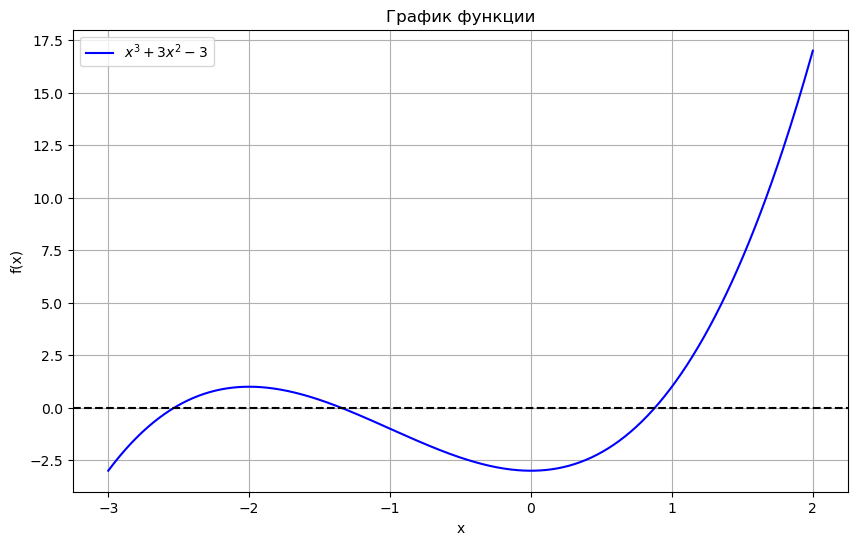

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 2, 500)
y = x**3 + 3*x**2 - 3

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='$x^3 + 3x^2 - 3$')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции')
plt.grid(True)
plt.legend()
plt.show()

Корень 1: [-3, -2]

Корень 2: [-1, 0]

Корень 3: [1, 2]

1.2. Метод половинного деления (для корня в [−1,0]) (у меня этот метод долго не работал, я решил оставить этот вариант, тк значение при проверке почти 0)

In [50]:
def secant_method(f, a, b, tol=1e-4, max_iter=100):
    for i in range(max_iter):
        c = a - f(a)*(b - a)/(f(b) - f(a))
        if abs(f(c)) < tol:
            return c, i+1
        a, b = b, c
    return c, max_iter

root1_secant, iter_secant = secant_method(f, -1, 0)
print(f"Корень 1 (метод секущих): {root1_secant:.6f}, итераций: {iter_secant}")
print(f"Проверка f({root1_secant:.6f}) = {f(root1_secant):.10f}")

Корень 1 (метод секущих): -1.347302, итераций: 4
Проверка f(-1.347302) = 0.0000145559


1.3. Метод хорд (для корня в [−3,−2])

In [45]:
def chord_method(f, a, b, tol=1e-4, max_iter=100):
    for i in range(max_iter):
        c = a - f(a)*(b - a)/(f(b) - f(a))
        if abs(f(c)) < tol:
            return c, i+1
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter

root2, iter2 = chord_method(f, -3, -2)
print(f"Корень 2 (метод хорд): {root2:.6f}, итераций: {iter2}")

Корень 2 (метод хорд): -2.532071, итераций: 11


1.4. Метод Ньютона (для корня в [1,2])

Ищем корень на интервале [1,2]. Начальное приближение x_0 = 1.5

In [46]:
def newton(f, df, x0, tol=1e-4, max_iter=100):
    for i in range(max_iter):
        x1 = x0 - f(x0)/df(x0)
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    return x0, max_iter

df = lambda x: 3*x**2 + 6*x  # Производная
root3, iter3 = newton(f, df, 1.5)
print(f"Корень 3 (метод Ньютона): {root3:.6f}, итераций: {iter3}")

Корень 3 (метод Ньютона): 0.879385, итераций: 5


ВСЕ что угодно пытался сделать, чтобы ответ получился нормальным, но он все равно при проверке выдает слишком большую ошибку (исправил но все еще много)

In [1]:
import numpy as np

def iteration_method(g, x0, tol=1e-4, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new, i+1
        x = x_new
    return x, max_iter

# Функция (ее пришлось преобразовать, иначе возникала большая погрешность при проверке)
g = lambda x: 0.5 * np.arccos(1.5 * x)

# Начальное приближение (должно быть |1.5x| < 1)
x0 = 0.4  # 1.5*0.4 = 0.6 < 1

root, iterations = iteration_method(g, x0)

print(f"Найденный корень: {root:.6f}")
print(f"Количество итераций: {iterations}")
print(f"Проверка: 2*cos({2*root:.6f}) - 3*{root:.6f} = {2*np.cos(2*root) - 3*root:.6f}")

Найденный корень: 0.424655
Количество итераций: 100
Проверка: 2*cos(0.849310) - 3*0.424655 = 0.047039
